In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\AmirHussain\Desktop\svm-smo\UniversalBank.csv")

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:

X = df.drop(['Personal Loan', 'ID','ZIP Code','Education', 'Online'], axis=1).to_numpy()
y = df['Personal Loan'].to_numpy()


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


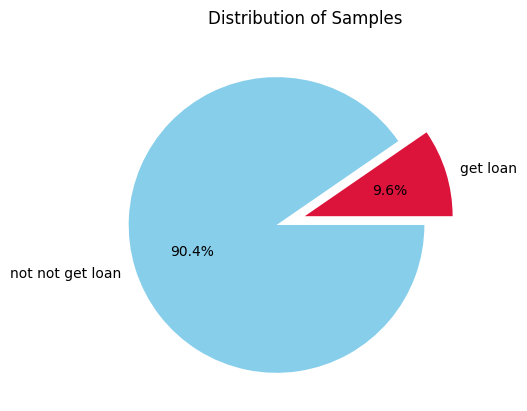

In [7]:
loan_yes = np.sum(y == 1)
loaon_no = np.sum(y == 0)

labels = ["get loan", "not not get loan"]
counts = [loan_yes, loaon_no]

# Example colors that are complementary and visually pleasing
colors = [ 'crimson', 'skyblue']

plt.pie( counts, labels = labels,   colors=colors,  autopct='%1.1f%%', explode=[0,  0.2])

plt.title('Distribution of Samples')
plt.savefig("Distribution of Samples.jpg")
plt.show()

In [8]:
X_train.shape , y_train.shape  , X_test.shape , y_test .shape 

((2500, 9), (2500,), (2500, 9), (2500,))

In [9]:
set(y_train)

{0, 1}

In [10]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# y_train = y_train.to_numpy()
# y_test = y_test.to_numpy()

In [11]:
class SVM:
    def __init__(self,*, C : float = 1.0 ,
                 kernel : str = "linear",
                 tol : float = 1e-2,
                 degree : int = 2,
                 max_iter : int = 100) -> None:
        self.Kernels = {
            "linear": self._linear_kernel ,
            "poly" : self._poly_lernel ,
            "rbf" : self._rbf_kernel
        }
        self.C = C # Penalty
        self.kernel = self.Kernels[kernel] # kernel
        self.tol = tol # tolerance for Convergance
        self.degree = degree # degree for polynomial kernel
        self.max_iter = max_iter # Max iteration
        self.Weights = None # initialize Weights
        self.Bias = None # initialize Bias
    
    # linear Kernel
    def _linear_kernel(self, X1 : np.ndarray , X2 :  np.ndarray):
        self.kernel_output = np.dot( X1, X2.T)
        return self.kernel_output
    
    # polynomial Kernel
    def _poly_lernel(self, X1 : np.ndarray, X2 : np.ndarray):
        self.kernel_output = np.dot( X1, X2.T) ** self.degree
        return self.kernel_output
    
    # Radial basis function kernel
    def _rbf_kernel(self, X1 : np.ndarray, X2 : np.ndarray ):
        self.kernel_output = np.exp((np.linalg.norm(X1 - X2)** 2) / -.1 ** 2)
        return self.kernel_output
    
    # random range init
    def _get_random_int(self, a, b, z):
        r = list(range(a, z)) + list(range(z+1, b))
        return np.random.choice(r)
    
    # Calculate wieghts
    def _calc_weights(self, X, y, alpha):
        return np.dot(X.T, alpha * y)
    
    # calculate Bias
    def calc_bias(self, X, y, W):
        return np.mean(y - np.dot(X, W))
    
    # Calculate Error
    def _calc_error(self, X_k, y_k, W, b):
        return np.sign(np.dot(X_k, W) + b) - y_k
    
    # Compute low and high margin
    def _compute_low_high(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
            if y_i != y_j:
                return max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j)
            else :
                return max(0 , alpha_prime_j + alpha_prime_j - C), min(C , alpha_prime_i + alpha_prime_j)
    
    def fit(self, X : np.ndarray, y : np.ndarray):
        n, d = X.shape
        alpha = np.zeros((n))

        for iter in range(self.max_iter):
            alpha_previus = np.copy(alpha)
            for j in range(0, n):
                # get random int i, where i != j
                i = self._get_random_int(0, n-1, j)
                #calculating the second derivation of objective functiom along with diagonal line
                kij = self.kernel(X[i], X[i]) + self.kernel(X[j], X[j]) - 2 * self.kernel(X[i], X[j])
                if kij <= 0 :
                    continue
                #storing the current values of ai and aj
                alpha_prime_j, alpha_prime_i = alpha[j] , alpha[i]
                L, H = self._compute_low_high(self.C , alpha_prime_j, alpha_prime_i , y[j], y[i] )

                # Compute model parameters
                self.Weights = self._calc_weights(X, y, alpha)
                self.Bias = self.calc_bias(X, y , self.Weights)

                # Calculate Ei, Ej
                E_i = self._calc_error(X[i], y[i], self.Weights, self.Bias)
                E_j = self._calc_error(X[j], y[j], self.Weights, self.Bias)

                # set new alphas
                #aj_new = aj_old + yj(Ei-Ej)/kij
                alpha[j] = alpha_prime_j + float(y[j] * (E_i - E_j)) / kij

                #aj clipped
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                #ai
                alpha[i] = alpha_prime_i + y[i] * y[j] * (alpha_prime_j - alpha[j])
            
            # Checking For Convergance
            diff = np.linalg.norm(alpha - alpha_previus)
            if diff < self.tol:
                break
        # Compute Final Model Parameter
        self.Weights = self._calc_weights(X, y, alpha)
        self.Bias = self.calc_bias(X, y, self.Weights)
        self.alpha = alpha
        # Get supprt Vectors
        idx = np.where(alpha > 0)[0]
        self.Support_vcotor = X[idx]
        return None
    
    def predict(self, X : np.ndarray):
        pre = np.sign(np.dot(X, self.Weights) + self.Bias)

        pre = np.where(pre == -1 , 0, pre)
        return pre
    
    def accuracy_score(self, X, y):
        if isinstance(X, pd.core.frame.DataFrame):
            X = X.to_numpy()
            pass
        if isinstance(y , pd.core.series.Series):
            y = y.to_numpy()
        return np.mean(self.predict(X) == y)



In [12]:
# Train the SVM model
svm = SVM(C = 1. ,kernel = "linear", tol = .01, max_iter=100, degree = 2)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

In [13]:
# Compute precision, recall,accuracy and F1 score

accuracy = svm.accuracy_score(X_test, y_test)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.7032
Precision: 0.25553319919517103
Recall: 0.9921875
F1 Score: 0.40640000000000004


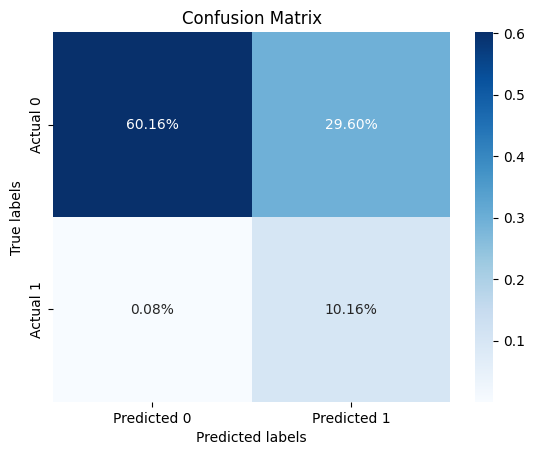

In [14]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
# plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix / len(y_test), annot=True, fmt='.2%', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])


plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('Confusion Matrix.png')

plt.show()

In [16]:
svm.Support_vcotor

array([[ 0.95695144,  1.06556106,  1.14649149, ..., -0.3421532 ,
         3.97221896,  1.54963239],
       [-1.30657999, -1.28694013,  0.99151592, ..., -0.3421532 ,
        -0.25174846, -0.64531434],
       [ 0.78283364,  0.71704236,  2.03206612, ..., -0.3421532 ,
         3.97221896,  1.54963239],
       ...,
       [ 0.95695144,  1.06556106,  2.58555026, ..., -0.3421532 ,
         3.97221896, -0.64531434],
       [-0.69716768, -0.76416209,  1.10221275, ...,  2.9226674 ,
         3.97221896, -0.64531434],
       [-0.52304988, -0.67703242,  1.43430324, ..., -0.3421532 ,
        -0.25174846, -0.64531434]])

<Axes: >

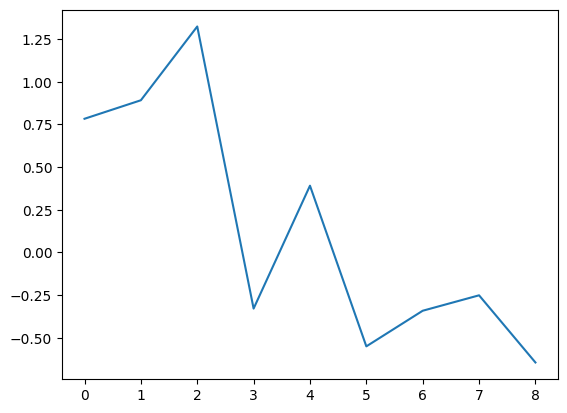

In [26]:
sns.lineplot(svm.Support_vcotor[6])